**Import the required libraries:**

In [162]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sympy import false

In [163]:
# Download NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\Rajat
[nltk_data]     Shrivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Rajat
[nltk_data]     Shrivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rajat
[nltk_data]     Shrivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Rajat
[nltk_data]     Shrivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Rajat
[nltk_data]     Shrivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Us

True

In [164]:
df=pd.read_csv("training_data_lowercase.csv", sep='\t', names=["labels", "text"], header=None)
print(df.columns)
print(df.head())

Index(['labels', 'text'], dtype='object')
   labels                                               text
0       0  donald trump sends out embarrassing new year‚s...
1       0  drunk bragging trump staffer started russian c...
2       0  sheriff david clarke becomes an internet joke ...
3       0  trump is so obsessed he even has obama‚s name ...
4       0  pope francis just called out donald trump duri...


In [165]:

data_train=df["text"]
data_test=df["labels"]

In [166]:
def tokenize_text(text):
    if isinstance(text, str):

        return word_tokenize(text)   # returns a list of tokens
    else:
        return []
data_token=data_train.apply(tokenize_text)

**Remove stop words**

In [167]:
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    words_clean = [word for word in text if word not in stop_words]
    return ' '.join(words_clean)

filter_data=data_token.apply(remove_stop_words)

print(filter_data.head())

0    donald trump sends embarrassing new year‚s eve...
1    drunk bragging trump staffer started russian c...
2    sheriff david clarke becomes internet joke thr...
3    trump obsessed even obama‚s name coded website...
4    pope francis called donald trump christmas speech
Name: text, dtype: object


**Split the data for train and test**

In [ ]:
from sklearn.model_selection import train_test_split

X=filter_data
y=data_test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(X_train.shape)
print(X_test.shape)



**Load the vectorizer and vectorize the data**

In [169]:
X_train_str = X_train.apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
X_test_str  = X_test.apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

tfidf = TfidfVectorizer(
     max_features=5000,
    analyzer='char', ngram_range=(3,5)
)
X_train_tfidf = tfidf.fit_transform(X_train_str)
X_val_tfidf = tfidf.transform(X_test_str)


In [170]:
print(X_val_tfidf.shape)
print(X_train_tfidf.shape)

(6831, 5000)
(27321, 5000)


**Initialize the model and train the model**

In [171]:
from sklearn.linear_model import  LogisticRegression

model = LogisticRegression(max_iter=500)

model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [172]:
# from xgboost import XGBClassifier
#
# model = XGBClassifier(
#     n_estimators=300,
#     learning_rate=0.1,
#     max_depth=6,
# )
#
# model.fit(X_train_tfidf, y_train)

**Create prediction with validation data**

In [173]:
y_pred = model.predict(X_val_tfidf)

**Calculate accuracy score based on prediction**

In [174]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9347094129702825


**Confusion matrix based on test and prediction**

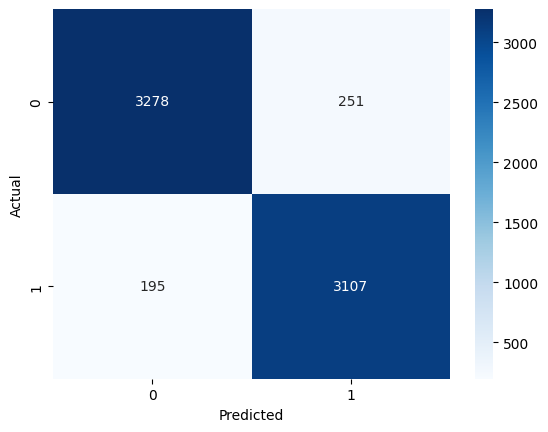

In [175]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Test the model with load the test data**

In [179]:
test_data=pd.read_csv("testing_data_lowercase_nolabels.csv", sep='\t', names=["labels", "text"], header=None)

**Prepocess the test data**

In [180]:
test_data.columns

Index(['labels', 'text'], dtype='object')

In [189]:
test_data["text"].apply(tokenize_text)
test_data["text"].apply(remove_stop_words)
test_data_str  = test_data["text"].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
tfidf_test_data=tfidf.transform(test_data_str)

Validate

In [191]:
y_pred = model.predict(tfidf_test_data)
test_data["labels"]=y_pred
test_data.to_csv("testing_data_lowercase_nolabels.csv",header=False, index=False)